** 需下載以下特徵模型，放置與本程式碼之子資料夾`model`，也就是說，以下的模型相對於本程式會有以下相對路徑：`model/**`
* 人類偵測模型：[blaze_face_short_range.tflite](https://storage.googleapis.com/mediapipe-models/face_detector/blaze_face_short_range/float16/latest/blaze_face_short_range.tflite)


Ref: https://ai.google.dev/edge/mediapipe/solutions/vision/face_landmarker/python?hl=zh-tw https://developers.google.com/mediapipe/solutions/vision/face_detector/python



Screenshot saved as MediaPipe_facial_organs_detection.png


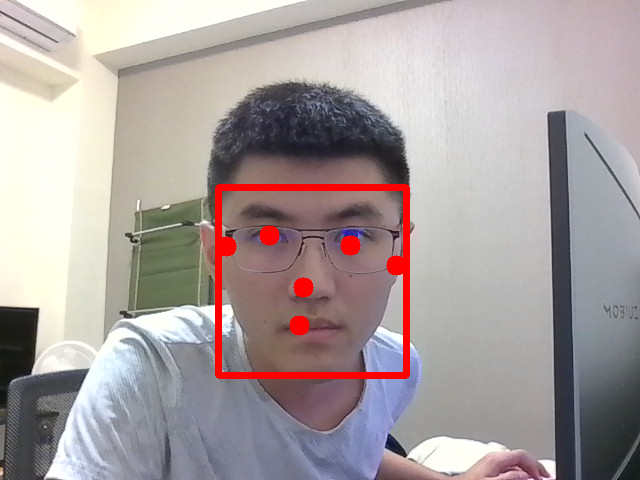

In [ ]:
import cv2
import numpy as np
from IPython.display import Image, display

import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
# 設定方法
BaseOptions = mp.tasks.BaseOptions
FaceDetector = mp.tasks.vision.FaceDetector
FaceDetectorOptions = mp.tasks.vision.FaceDetectorOptions
VisionRunningMode = mp.tasks.vision.RunningMode

# 人臉偵測設定
options = FaceDetectorOptions(
    base_options=BaseOptions(model_asset_path="./models/blaze_face_short_range.tflite"),
    running_mode=VisionRunningMode.IMAGE)

# 執行人臉偵測
with FaceDetector.create_from_options(options) as detector:
    cap = cv2.VideoCapture(0)               # 讀取攝影鏡頭（Webcam）
    while True:
        ret, frame = cap.read()             # 讀取影片的每一幀
        w = frame.shape[1]                  # 畫面寬度
        h = frame.shape[0]                  # 畫面高度
        mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=frame) # 轉換成 mediapipe 圖片物件
        detection_result = detector.detect(mp_image)  # 偵測人臉
        for detection in detection_result.detections:
            bbox = detection.bounding_box     # 人臉外框
            lx = bbox.origin_x                # 人臉左上 x 座標
            ly = bbox.origin_y                # 人臉左上 y 座標
            width = bbox.width                # 人臉寬度
            height = bbox.height              # 人臉高度
            cv2.rectangle(frame,(lx,ly),(lx+width,ly+height),(0,0,255),5) # opencv 繪圖
            # 取出人臉特徵值
            for keyPoint in detection.keypoints:
                cx = int(keyPoint.x*w)      # 特徵值 x 座標，乘以畫面寬度，因為特徵值是比例
                cy = int(keyPoint.y*h)      # 特徵值 y 座標，乘以畫面高度，因為特徵值是比例
                cv2.circle(frame,(cx,cy),10,(0,0,255),-1)
        if not ret:
            print("Cannot receive frame")   # 如果讀取錯誤，印出訊息
            break
        cv2.imshow('Live Video', frame)     # 如果讀取成功，顯示該幀的畫面

        key = cv2.waitKey(5) & 0xFF
        if key == ord('q'):   # 按下 q 鍵停止
            break

        elif key == ord('a'):  # 按下 'a' 鍵截圖並儲存
            cv2.imwrite('MediaPipe_facial_organs_detection.png', frame)
            print("Screenshot saved as MediaPipe_facial_organs_detection.png")
            display(Image(filename='MediaPipe_facial_organs_detection.png'))

    cap.release()                      # 所有作業都完成後，釋放資源
    cv2.destroyAllWindows()                 # 結束所有視窗

In [1]:
import mediapipe as mp
print("MediaPipe 已安裝，版本:", mp.__version__)

MediaPipe 已安裝，版本: 0.10.10
